# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city+"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["feels_like"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | mana
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | purisima de bustos
City not found. Skipping...
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | iskateley
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | saint croix
Processing Record 15 of Set 1 | vadso
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | negombo
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | alotau
City not found. Skipping...
Processing Record 20 of Set 1 | phalaborwa
Processing Record 21 of Set 1 | o

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,5.41,4.24,35,1.64,RU,1688644249
1,bethel,41.3712,-73.4140,26.34,24.43,0,0.00,US,1688644198
2,adamstown,-25.0660,-130.1015,20.52,20.64,70,4.90,PN,1688644251
3,port mathurin,-19.6833,63.4167,24.04,24.33,19,8.46,MU,1688644253
4,mana,5.6592,-53.7767,24.46,25.36,100,3.77,GF,1688644254


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,5.41,4.24,35,1.64,RU,1688644249
1,bethel,41.3712,-73.4140,26.34,24.43,0,0.00,US,1688644198
2,adamstown,-25.0660,-130.1015,20.52,20.64,70,4.90,PN,1688644251
3,port mathurin,-19.6833,63.4167,24.04,24.33,19,8.46,MU,1688644253
4,mana,5.6592,-53.7767,24.46,25.36,100,3.77,GF,1688644254


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

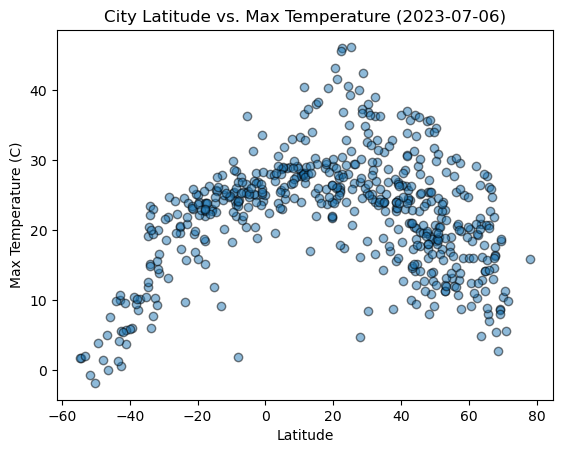

In [13]:
# Build scatter plot for latitude vs. temperature
lattemp_x = city_data_df["Lat"]
lattemp_y = city_data_df["Max Temp"]
plt.scatter(lattemp_x,lattemp_y,edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-07-06)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The max humidity recorded is: 44.18%


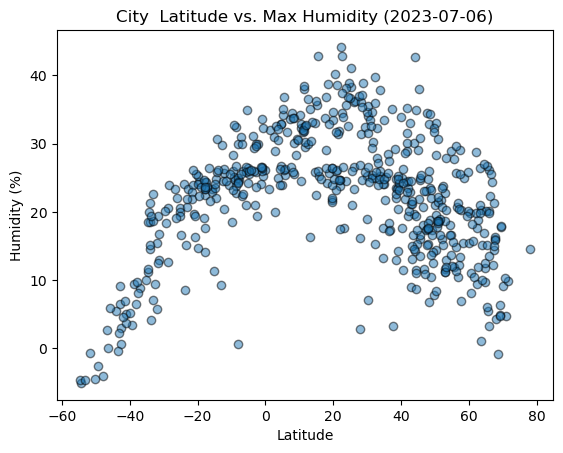

In [24]:
# Build the scatter plots for latitude vs. humidity
lathum_x = city_data_df["Lat"]
lathum_y = city_data_df["Humidity"]
plt.scatter(lathum_x,lathum_y,edgecolors="black",alpha=0.5)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City  Latitude vs. Max Humidity (2023-07-06)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
maxhum = city_data_df["Humidity"].max()
print(f"The max humidity recorded is: {maxhum}%")
plt.show()

#### Latitude Vs. Cloudiness

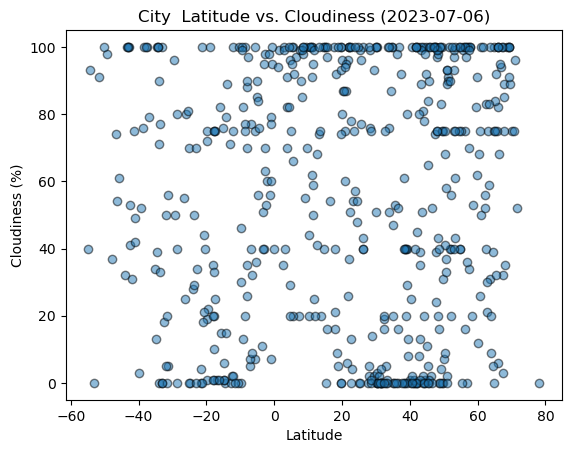

In [25]:
# Build the scatter plots for latitude vs. cloudiness
latcloud_x = city_data_df["Lat"]
latcloud_y = city_data_df["Cloudiness"]
plt.scatter(latcloud_x,latcloud_y,edgecolors="black",alpha=0.5)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City  Latitude vs. Cloudiness (2023-07-06)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

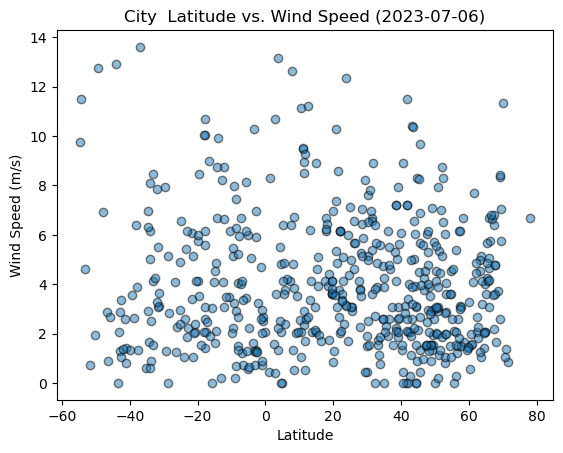

In [26]:
# Build the scatter plots for latitude vs. wind speed
latwind_x = city_data_df["Lat"]
latwind_y = city_data_df["Wind Speed"]
plt.scatter(latwind_x,latwind_y,edgecolors="black",alpha=0.5)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City  Latitude vs. Wind Speed (2023-07-06)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,5.41,4.24,35,1.64,RU,1688644249
1,bethel,41.3712,-73.4140,26.34,24.43,0,0.00,US,1688644198
4,mana,5.6592,-53.7767,24.46,25.36,100,3.77,GF,1688644254
7,vorgashor,67.5833,63.9500,14.63,14.42,100,6.38,RU,1688644258
8,iskateley,67.6803,53.1512,16.39,16.02,89,4.79,RU,1688644259


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,20.52,20.64,70,4.90,PN,1688644251
3,port mathurin,-19.6833,63.4167,24.04,24.33,19,8.46,MU,1688644253
5,blackmans bay,-43.0167,147.3167,10.07,6.53,100,2.87,AU,1688644255
6,edinburgh of the seven seas,-37.0676,-12.3116,10.24,8.78,79,13.61,SH,1688644256
9,lebu,-37.6167,-73.6500,8.55,8.17,100,1.35,CL,1688644261


###  Temperature vs. Latitude Linear Regression Plot

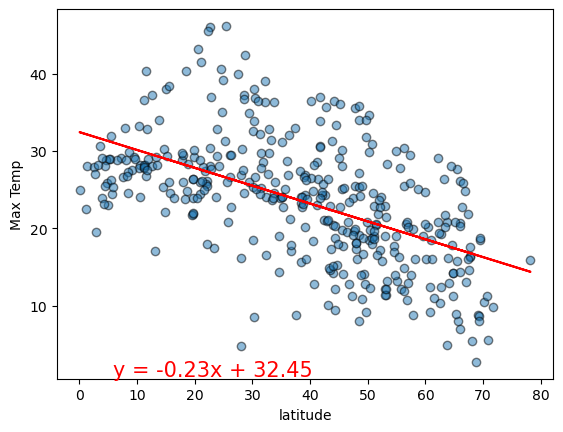

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Max Temp")
plt.show()

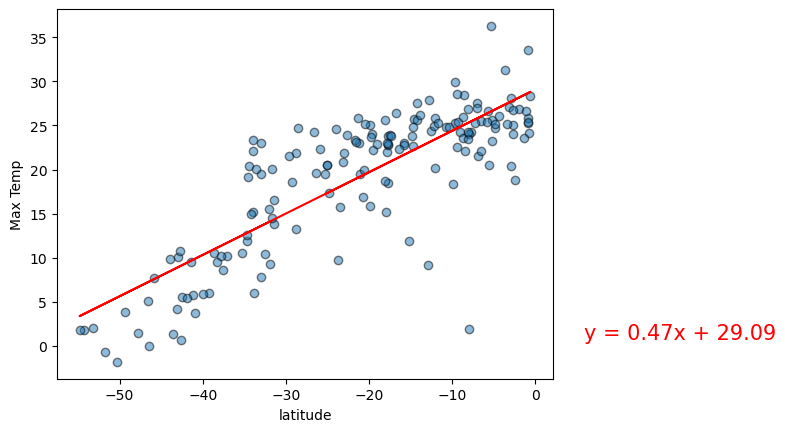

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression of latitude versus hemisphere shows a negative relationship between distance from the equator (lat = 0) and Temperature. This is confirmed as it can be seen that as the absolute value for the latitude increases (abs(lat)) the maximum recorded temperature decreases accordingly. This makes sense as we can see the lower temperatures at the north and south poles.

### Humidity vs. Latitude Linear Regression Plot

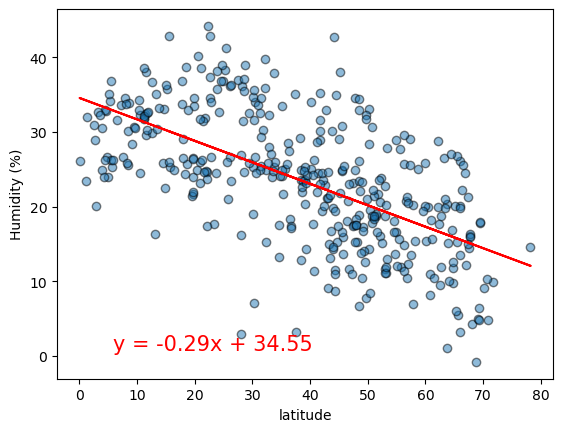

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Humidity (%)")
plt.show()

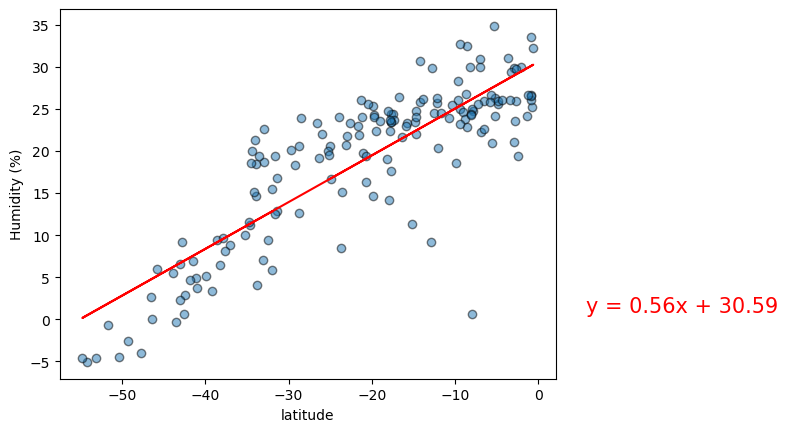

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
We can see a negative relationship between the absolute value for latitude (abs(lat)) and humidity, this is likely related to temperatre as warmer temperatures make it easier for higher humidity environments to exist as seen in the tropics, which are found across the equator.

### Cloudiness vs. Latitude Linear Regression Plot

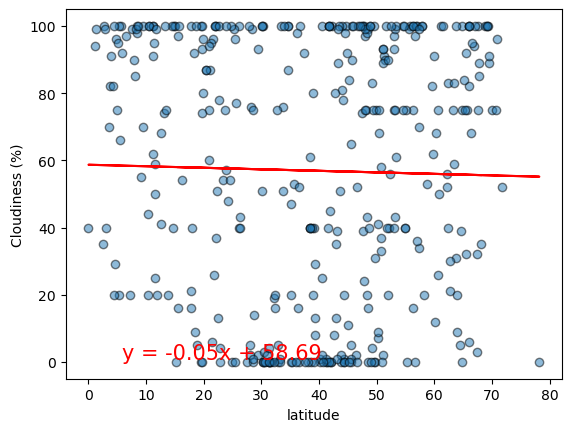

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

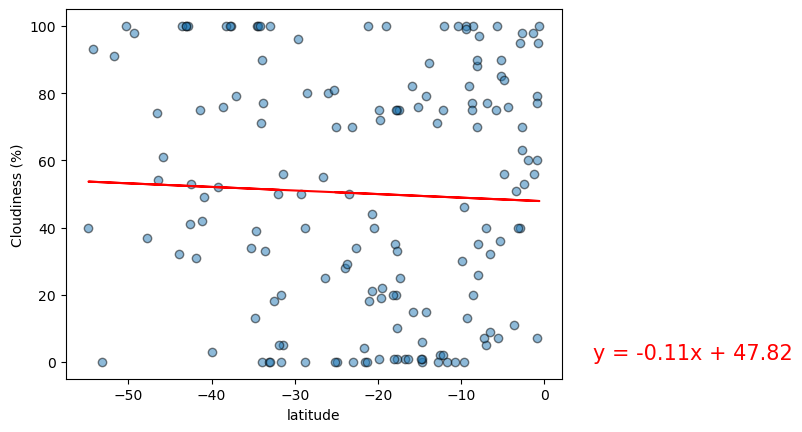

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The linear regression analysis shows no real relationship between Cloudiness and latitude, however this analysis suggests that in the norther hemisphere there is a slightly negative correlation between latitude and cloudiness. There is no real relationship as this is not equally reflected in the southern hemisphere data.

### Wind Speed vs. Latitude Linear Regression Plot

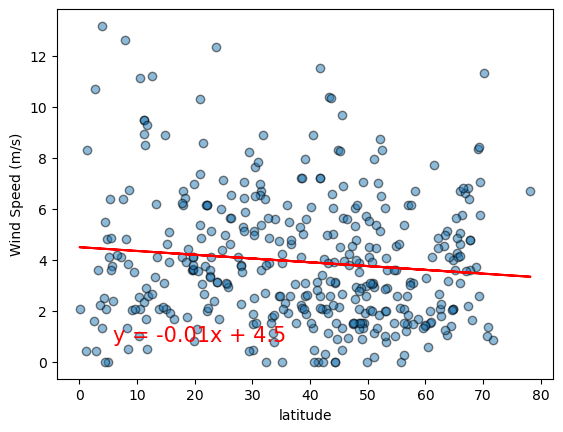

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

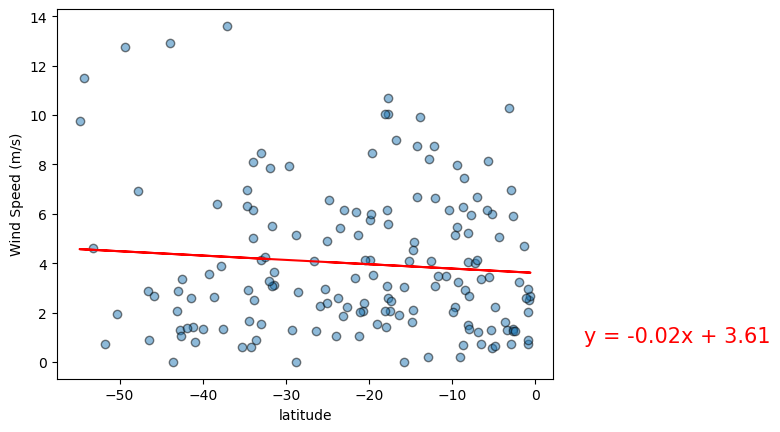

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",annotation_clip=False)
plt.xlabel("latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
As with Cloudiness, there is no significant relationship between wind speed and latitude.